**If you like my notebook, please upvote my work!**

**If you use parts of this notebook in your scripts/notebooks, giving some kind of credit for instance link back to this notebook would be very much appreciated. Thanks in advance! :)**

P.S:

Please make sure that you have plotly installed on your local machine.

Thankyou! :) Hope you like my work!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


# Importing important libraries.

In [2]:
import keras
import plotly.express as px
from keras import backend as K
from keras.optimizers import Adam
import plotly.graph_objects as go
import plotly.figure_factory as ff
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


# Loading the Dataset.

In [3]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# Splitting the target and predictor variables.

In [4]:
df_train_x = df_train.drop('label',axis =1)
df_train_y = df_train[['label']]

# Machine Learning Model.

## Splitting data into train and test set 

In [5]:
np_train_x = df_train_x.to_numpy().reshape(-1,28,28,1)
np_train_y = df_train_y.to_numpy()
x_train,x_test,y_train,y_test = train_test_split(np_train_x, np_train_y,test_size=0.10,random_state=42)

## Defining the Image generator function

In [6]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    brightness_range = [0.8,1.])
datagen.fit(x_train)

## Defining the layers and metrics for the Neural Network

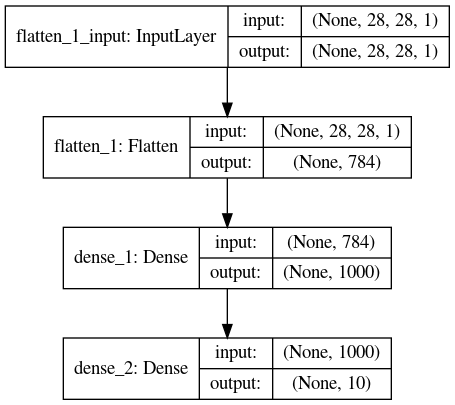

In [7]:
model  = Sequential()
model.add(Flatten(input_shape = (28,28,1)))
model.add(Dense(1000,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.compile(Adam(lr = 0.0001),loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
keras.utils.plot_model(model, "Neural_Network.png", show_shapes=True)

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


## Training the Neural Network

In [9]:
model.fit_generator(datagen.flow(x_train,y_train,batch_size = 30),steps_per_epoch = 1000,
                    validation_data = (x_test,y_test),epochs = 5,verbose = 2)

Epoch 1/5
 - 16s - loss: 0.7827 - accuracy: 0.7661 - val_loss: 21.1462 - val_accuracy: 0.7474
Epoch 2/5
 - 16s - loss: 0.3799 - accuracy: 0.8970 - val_loss: 8.5690 - val_accuracy: 0.8986
Epoch 3/5
 - 16s - loss: 0.2800 - accuracy: 0.9240 - val_loss: 5.3823 - val_accuracy: 0.9440
Epoch 4/5
 - 16s - loss: 0.2189 - accuracy: 0.9400 - val_loss: 5.5630 - val_accuracy: 0.9474
Epoch 5/5
 - 16s - loss: 0.1916 - accuracy: 0.9461 - val_loss: 5.5656 - val_accuracy: 0.9524


## Plotting the accuracy of the NN

In [10]:
plot = pd.DataFrame()
plot['Validation Accuracy'] = model.history.history['val_accuracy']
plot['Training Accuracy'] = model.history.history['accuracy']
plot['Validation Loss'] = model.history.history['val_loss']
plot['Training Loss'] = model.history.history['loss']
plot['Epoch'] = plot.reset_index()['index']+1
plot

,Validation Accuracy,Training Accuracy,Validation Loss,Training Loss,Epoch
0,0.747381,0.766067,21.146154,0.782730,1
1,0.898571,0.896967,8.568992,0.379935,2
2,0.944048,0.923967,5.382293,0.279997,3
3,0.947381,0.939967,5.563026,0.218900,4
4,0.952381,0.946100,5.565560,0.191611,5


In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = plot['Epoch'],y = plot['Training Accuracy'].to_numpy()//.0001/100,
                         mode = 'lines+markers',name = 'Training Accuracy',
                         hovertemplate='The Training Accuracy is: %{y}%<br>'+
                                       'The Epochs run are: %{x}<extra></extra>'))
fig.add_trace(go.Scatter(x = plot['Epoch'],y = plot['Validation Accuracy']//.0001/100,
                         mode = 'lines+markers',name = 'Validation Accuracy',
                         hovertemplate='The Validation Accuracy is: %{y}%<br>'+
                                       'The Epochs run are: %{x}<extra></extra>'))
fig.update_layout(title  = 'Change in validation and training accuracy over the epochs',
                  xaxis_title = 'Epochs run',yaxis_title = 'Acuuracy (In percentage)',
                  xaxis_range = [0.5,5.5],yaxis_range = [70,100])
fig.show()

We can see the the Validation accuracy is higher than the training accuracy. This might be because applying so many tranformations together on the images makes it difficult to classify them but that is not the case with valigation set as ve have not applied transformations on it

In [12]:
predictions = model.predict_classes(x_test)
y_test_np = y_test
classes = [0,1,2,3,4,5,6,7,8,9]


confusion_mat = np.zeros((len(classes),len(classes)))
for i in range(len(predictions)):
    confusion_mat[classes.index(predictions[i])][classes.index(y_test_np[i])]+=1
confusion_mat = confusion_mat.T
confusion_mat_norm = confusion_mat/len(y_test_np)
confusion_mat_norm = (confusion_mat_norm//0.0001)/10000

fig = ff.create_annotated_heatmap(confusion_mat_norm, x=classes, y=classes, 
                                  annotation_text=confusion_mat_norm,
                                  colorscale='Viridis',text = confusion_mat,
                                  hovertemplate='Expected Value: %{y}<br>'+
                                                'Predicted Value: %{x}<br>'+
                                                'No. of datapoints in this category are: %{text}<extra></extra>')
fig.update_layout(title_text='<b>Confusion Matrix for the dataset:</b>',
                  xaxis = {'title':'Predicted Values'},width = 900,
                  yaxis = {'title':'Expected Values','autorange':'reversed'})
fig.update_traces(showscale = True)
fig.show()

We can see that the confusion matrix shows higher values for digits that look similar and might be confusiong to distinguish between and lower values for the digits that are easy to distinguish between.

# Predicting output over the testset.

## Reading test file

In [13]:
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
df_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [14]:
np_test = df_test.to_numpy().reshape(-1,28,28,1)


In [15]:
df_test['label'] = model.predict_classes(np_test)

In [16]:
a = []
for i in range(28000):
    a.append(i+1)
df_test['ImageId'] = a
df_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,ImageId
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0,4.307571,14000.500000
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0,2.869852,8083.048105
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000,7000.750000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000,14000.500000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,7.000000,21000.250000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0,9.000000,28000.000000


In [17]:
df_test[['ImageId','label']].to_csv('submission.csv',index=False)